## SGD Classifier
사이킷런에서 확률적 경사 하강법을 제공하는 대표적 분류용 클래스  
전달된 훈련 세트에서 1개씩 샘플을 꺼내어 경사하강법 단계를 수행한다.   
일정 에포크동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.  

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.shape

(159, 6)

In [3]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [6]:
fish_input = fish[fish.columns[1:]].to_numpy()
fish_target = fish[fish.columns[0]].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42) 

트레인, 테스트 셋의 특성을 표준화 전처리를 시켜준다.   
반드시 트레인 셋에서 학습한 통계 값으로 테스트 셋을 변환시켜주어야 한다!!!

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [9]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd = SGDClassifier(loss='log', max_iter=10, random_state=42)

In [12]:
sgd.fit(train_scaled, train_target)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

#### Convergence Warning
모델이 충분히 수렴하지 않았다는 경고 (오류가 아님)  

In [13]:
sgd.score(train_scaled, train_target), sgd.score(test_scaled, test_target)

(0.773109243697479, 0.775)

`partial_fit()` 메서드로 모델 추가 훈련이 가능하다. `fit()`과 사용법이 같지만 호출 시마다 1에포크씩 이어 훈련이 가능하다.    

In [14]:
sgd.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [15]:
sgd.score(train_scaled, train_target), sgd.score(test_scaled, test_target)

(0.8151260504201681, 0.825)

트레인셋 점수는 에포크가 진행될 수록 꾸준히 증가하지만, 테스트 셋 점수는 어느순간 감소한다. 두 사이의 최소점을 찾는게 목표!

In [16]:
import numpy as np

In [26]:
sgd = SGDClassifier(loss='log', random_state=42)

In [27]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [28]:
train_score, test_score = list(), list()
for num in range(300):
    sgd.partial_fit(train_scaled, train_target, classes = classes)
    print(f'{num} train score {sgd.score(train_scaled, train_target)} test score {sgd.score(test_scaled, test_target)}')
    train_score.append(sgd.score(train_scaled, train_target))
    test_score.append(sgd.score(test_scaled, test_target))
    print('=' * 30)

0 train score 0.5294117647058824 test score 0.65
1 train score 0.6218487394957983 test score 0.55
2 train score 0.6386554621848739 test score 0.575
3 train score 0.7310924369747899 test score 0.7
4 train score 0.7226890756302521 test score 0.7
5 train score 0.7310924369747899 test score 0.7
6 train score 0.7647058823529411 test score 0.725
7 train score 0.7310924369747899 test score 0.775
8 train score 0.8151260504201681 test score 0.825
9 train score 0.7478991596638656 test score 0.7
10 train score 0.8319327731092437 test score 0.825
11 train score 0.8151260504201681 test score 0.8
12 train score 0.8571428571428571 test score 0.85
13 train score 0.8571428571428571 test score 0.9
14 train score 0.8403361344537815 test score 0.85
15 train score 0.865546218487395 test score 0.9
16 train score 0.865546218487395 test score 0.9
17 train score 0.865546218487395 test score 0.9
18 train score 0.8739495798319328 test score 0.9
19 train score 0.8823529411764706 test score 0.9
20 train score 0.87

127 train score 0.957983193277311 test score 0.925
128 train score 0.957983193277311 test score 0.925
129 train score 0.957983193277311 test score 0.925
130 train score 0.957983193277311 test score 0.925
131 train score 0.957983193277311 test score 0.925
132 train score 0.957983193277311 test score 0.925
133 train score 0.957983193277311 test score 0.925
134 train score 0.957983193277311 test score 0.925
135 train score 0.957983193277311 test score 0.925
136 train score 0.957983193277311 test score 0.925
137 train score 0.957983193277311 test score 0.925
138 train score 0.957983193277311 test score 0.925
139 train score 0.957983193277311 test score 0.925
140 train score 0.957983193277311 test score 0.925
141 train score 0.957983193277311 test score 0.925
142 train score 0.957983193277311 test score 0.925
143 train score 0.957983193277311 test score 0.925
144 train score 0.957983193277311 test score 0.925
145 train score 0.957983193277311 test score 0.925
146 train score 0.9579831932773

261 train score 0.957983193277311 test score 0.925
262 train score 0.957983193277311 test score 0.925
263 train score 0.957983193277311 test score 0.925
264 train score 0.957983193277311 test score 0.925
265 train score 0.957983193277311 test score 0.925
266 train score 0.957983193277311 test score 0.925
267 train score 0.957983193277311 test score 0.925
268 train score 0.957983193277311 test score 0.925
269 train score 0.957983193277311 test score 0.925
270 train score 0.9663865546218487 test score 0.925
271 train score 0.9663865546218487 test score 0.925
272 train score 0.9663865546218487 test score 0.925
273 train score 0.9663865546218487 test score 0.925
274 train score 0.9663865546218487 test score 0.925
275 train score 0.9663865546218487 test score 0.925
276 train score 0.9663865546218487 test score 0.925
277 train score 0.9663865546218487 test score 0.925
278 train score 0.9663865546218487 test score 0.925
279 train score 0.9663865546218487 test score 0.925
280 train score 0.966

In [29]:
import matplotlib.pyplot as plt

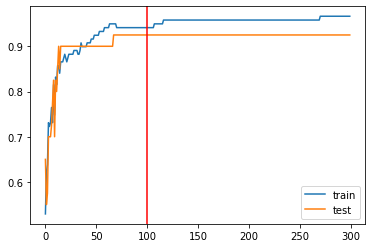

In [34]:
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.axvline(100, color='r')
plt.legend()

In [36]:
sgd = SGDClassifier(loss = 'log', max_iter=100, tol=None, random_state=42)
sgd.fit(train_scaled, train_target)
sgd.score(train_scaled, train_target), sgd.score(test_scaled, test_target)

(0.957983193277311, 0.925)

### 매개변수
1. tol : 일정 에포크동안 성능이 향상되지 않으면 자동으로 멈추기 때문에, tol 매개변수에서 향상될 최솟값을 지정한다.
2. loss : 여러 종류의 손실함수를 지정할 수 있다
    - default value 'hinge' : SVM 알고리즘을 위한 손실함수